In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import cv2 as cv
import seaborn as sns
import io
import os

## Read image

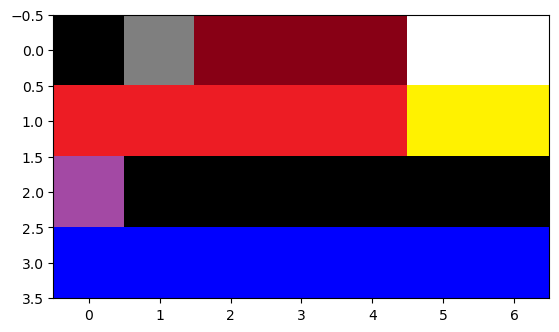

In [2]:
img = cv.imread('./png_images/28_pixels.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR -> RGB

plt.imshow(img)
None

In [3]:
height, width = img.shape[0], img.shape[1]
img.shape

(4, 7, 3)

In [4]:
R = img[:, :, 0]
R

array([[  0, 127, 136, 136, 136, 255, 255],
       [237, 237, 237, 237, 237, 255, 255],
       [163,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [5]:
G = img[:, :, 1]
G

array([[  0, 127,   0,   0,   0, 255, 255],
       [ 28,  28,  28,  28,  28, 242, 242],
       [ 73,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [6]:
B = img[:, :, 2]
B

array([[  0, 127,  21,  21,  21, 255, 255],
       [ 36,  36,  36,  36,  36,   0,   0],
       [164,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

In [7]:
R_flat = np.ravel(R)
G_flat = np.ravel(G)
B_flat = np.ravel(B)

In [8]:
R_flat

array([  0, 127, 136, 136, 136, 255, 255, 237, 237, 237, 237, 237, 255,
       255, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [9]:
G_flat

array([  0, 127,   0,   0,   0, 255, 255,  28,  28,  28,  28,  28, 242,
       242,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [10]:
B_flat

array([  0, 127,  21,  21,  21, 255, 255,  36,  36,  36,  36,  36,   0,
         0, 164,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
       255, 255], dtype=uint8)

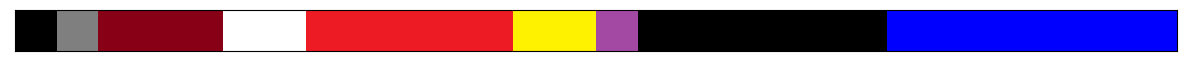

In [11]:
plt.figure(figsize=(15, 4))

flatten_img_full = np.vstack((R_flat, G_flat, B_flat)).T.reshape((1, height*width, 3)) 

plt.imshow(flatten_img_full)
plt.xticks([])
plt.yticks([])
None

### Read function

In [12]:
def read_png(path_to_png, draw_img=False, draw_flatten_img=False):
    """
    Read .png image and return flatten array of each channel
    Draw image and flatten image if required
    
    :return: 1) img - original image, shape=(heigth, width, 3)
             2) R_flat - flatten 1d array of R-cahnnel pixel values, shape=(heigth*width,)
             3) G_flat, B_flat - analogically to R_flat
    """
    img = cv.imread(path_to_png)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR -> RGB
    
    R = img[:, :, 0].astype(int)
    G = img[:, :, 1].astype(int)
    B = img[:, :, 2].astype(int)
    R_flat = np.ravel(R)
    G_flat = np.ravel(G)
    B_flat = np.ravel(B)
    
    height, width = img.shape[0], img.shape[1]
    if draw_img:
        plt.imshow(img)
        plt.title(f"Image {height}x{width}")
        plt.xticks([])
        plt.yticks([])
    if draw_flatten_img:
        plt.figure(figsize=(15, 4))
        flatten_img = np.vstack((R_flat, G_flat, B_flat)).T.reshape((1, height*width, 3)) 
        plt.imshow(flatten_img)
        plt.title(f"Flatted image 1x{height * width}")
        plt.xticks([])
        plt.yticks([])
        
    return img, R_flat, G_flat, B_flat

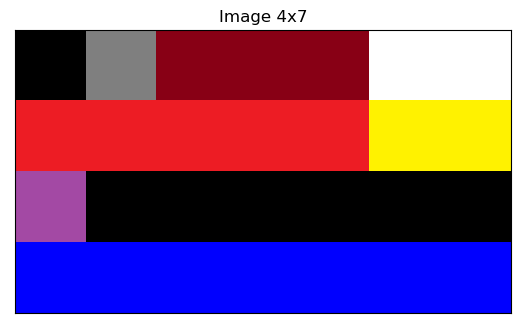

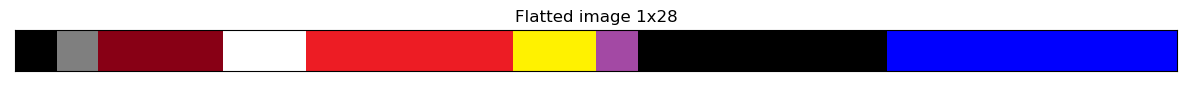

In [13]:
_, R_flat, G_flat, B_flat = read_png('./png_images/28_pixels.png', True, True)

In [14]:
R_flat

array([  0, 127, 136, 136, 136, 255, 255, 237, 237, 237, 237, 237, 255,
       255, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])

In [15]:
G_flat

array([  0, 127,   0,   0,   0, 255, 255,  28,  28,  28,  28,  28, 242,
       242,  73,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0])

In [16]:
B_flat

array([  0, 127,  21,  21,  21, 255, 255,  36,  36,  36,  36,  36,   0,
         0, 164,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255,
       255, 255])

### Draw channels

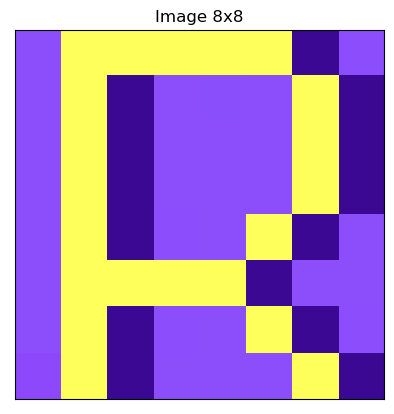

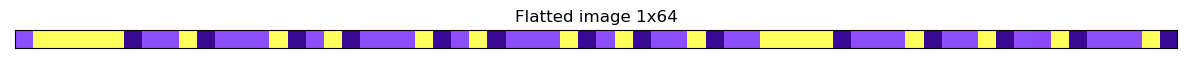

In [17]:
img, R, G, B = read_png('./png_images/R_video.png', True, True)

In [36]:
def heat_channel(pixel_values, channel='R'):
    """
    Draws heatmap of single image channel
    
    :param pixel_values: 2d array of one image channel OR 1d array of one flatten image channel 
    :param channel: name of the channel ('R', 'G' or 'B')
    :return: None
    """
    assert channel in ['R', 'G', 'B'], "channel must be R, G or B"
    
    if len(pixel_values.shape) == 1:
        pixel_values = pixel_values.reshape((1, pixel_values.shape[0]))
    else:
        assert len(pixel_values.shape) == 2, "pixel_values must be 1d or 2d array"
    
    # choose color pallete
    if channel == 'R':
        color_palete = sns.dark_palette("#FF0000", reverse=False, as_cmap=True)
    elif channel == 'G':
        color_palete = sns.dark_palette("#00FF00", reverse=False, as_cmap=True)
    elif channel == 'B':
        color_palete = sns.dark_palette("#0000FF", reverse=False, as_cmap=True)
    
    # draw heatmap
    sns.heatmap(pixel_values, 
                annot=True, 
                cmap=color_palete,
                fmt='g',
                cbar=False,
                linewidths=0.9,
                linecolor='black')
    plt.grid()
    plt.xticks([])
    plt.yticks([])

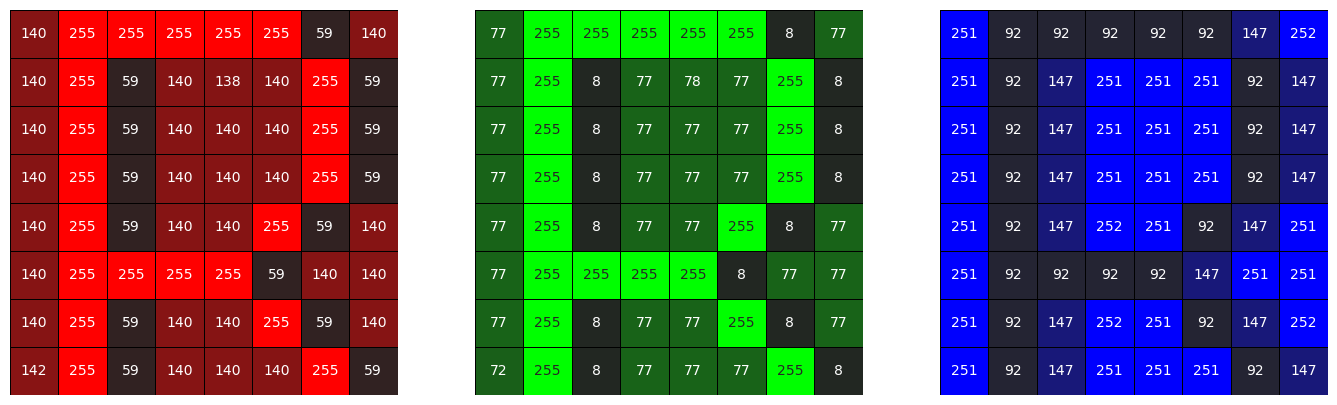

In [28]:
plt.figure(figsize=(17, 5))

plt.subplot(1, 3, 1)
heat_channel(img[:, :, 0], 'R')

plt.subplot(1, 3, 2)
heat_channel(img[:, :, 1], 'G')

plt.subplot(1, 3, 3)
heat_channel(img[:, :, 2], 'B')

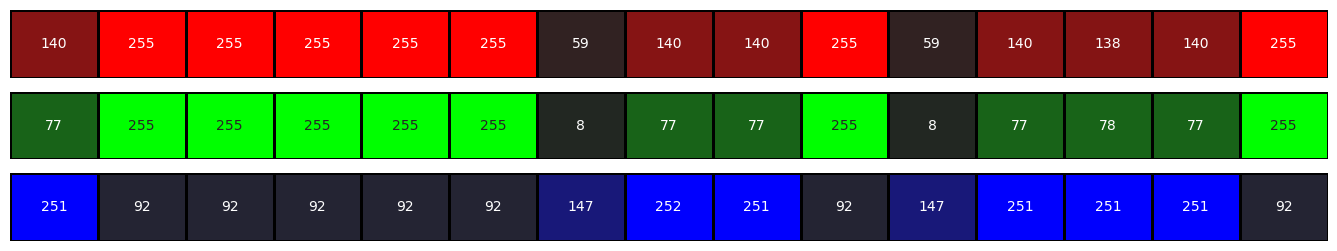

In [42]:
plt.figure(figsize=(17, 3))

# indexes_start = -15
# indexes_end = len(R)

indexes_start = 0
indexes_end = 15


plt.subplot(3, 1, 1)
heat_channel(R[indexes_start:indexes_end], 'R')

plt.subplot(3, 1, 2)
heat_channel(G[indexes_start:indexes_end], 'G')

plt.subplot(3, 1, 3)
heat_channel(B[indexes_start:indexes_end], 'B')

In [7]:
def hash(r, g, b):
    return (r * 3 + g * 5 + b * 7) % 64

In [10]:
hash(140, 77, 251)

2

In [59]:
a = {'QOI_DIFF_SMALL': [3, 5, 6]}

In [72]:
list(a.keys())[0]

'QOI_DIFF_SMALL'

In [12]:
hash(255, 255, 255)

49

In [13]:
hash(255, 255, 252)

28

In [15]:
n = 1000
hashes = np.zeros(n)

r_vals = np.zeros(n)
g_vals = np.zeros(n)
b_vals = np.zeros(n)


for i in range(n):
    r_vals[i] = np.random.randint(0, 256)
    g_vals[i] = np.random.randint(0, 256)
    b_vals[i] = np.random.randint(0, 256)
    
    hashes[i] = hash(r_vals[i], g_vals[i], b_vals[i])

In [17]:
np.unique(hashes)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63.])

In [38]:
indexes = np.where(hashes == 55)[0]
indexes

array([ 40,  96,  99, 116, 123, 136, 144, 146, 172, 413, 473, 514, 524,
       525, 529, 588, 597, 608, 738, 803, 884, 920, 939], dtype=int64)

In [41]:
r_vals[indexes]

array([181.,  84., 174.,  46.,  75., 190., 221., 247.,  63., 170., 229.,
       109., 130., 174., 119., 157., 148.,  94., 169., 196., 157.,  53.,
        15.])

In [42]:
g_vals[indexes]

array([140.,  86., 254., 209.,   7., 218., 106., 107.,  25.,   6.,  40.,
       200., 239.,  27., 245., 159.,  76., 168., 231.,  27., 177., 231.,
       189.])

In [43]:
b_vals[indexes]

array([ 68., 139.,  17., 168., 181., 237.,  66.,  45., 219.,  77.,  64.,
       248.,  74., 106., 175., 211., 137.,   3., 255., 188., 253., 195.,
        31.])

In [44]:
R = r_vals[indexes]
G = g_vals[indexes]
B = b_vals[indexes]

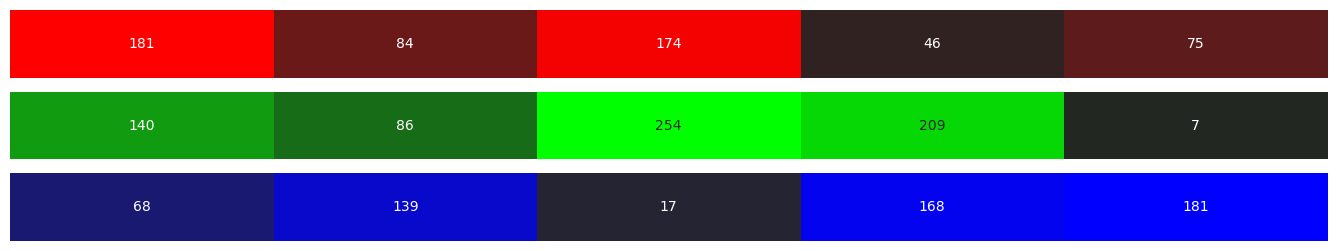

In [45]:
plt.figure(figsize=(17, 3))

indexes_border = 5

plt.subplot(3, 1, 1)
heat_channel(R[:indexes_border], 'R')

plt.subplot(3, 1, 2)
heat_channel(G[:indexes_border], 'G')

plt.subplot(3, 1, 3)
heat_channel(B[:indexes_border], 'B')

In [48]:
hash(181, 140, 68)

55

In [49]:
hash(75, 7, 181)

55

## Bytes in python

In [423]:
QOI_OP_RUN = 0xc0  # 11xxxxxx

In [213]:
bin(QOI_OP_RUN)

'0b11000000'

In [211]:
hex(0b11000000)

'0xc0'

In [300]:
hex(0b11111110)

'0xfe'

In [367]:
# one-byte file
with open('./data/file.txt', 'wb') as f:
    f.write(b'\xc0')  # 1 byte (use this)
    # f.write(b'111110')  # 6 bytes
    
with open('./data/file.txt', 'rb') as f:
    val = f.read()
    
val

b'\xc0'

In [241]:
tag = b'\xc0'
tag

b'\xc0'

In [386]:
tag.hex()

'c0'

In [442]:
# hex -> bytes example (!!)
bytes.fromhex('c0')

b'\xc0'

In [387]:
# hex to binary
## step 1: ex to dec
dec_value = int(tag.hex(), base=16)

## step 2: dec to bin
bin_value = bin(dec_value)

bin_value

'0b11000000'

In [402]:
# sum of binary nums
bin1 = 0b11000000
bin2 = 0b101

bin_sum = bin(bin1 + bin2)

bin_sum

'0b11000101'

In [338]:
# num = np.random.randint(0, 64)
num = 5
bits_6 = '{0:06b}'.format(num)

print('decimal num:', num)
print('num ecoded to 6 bits:', bits_6)

print('num ecoded to 6 bits:', bin(num))

print('bits decoded to decimal num:', int(bin(num), 2), 'or', int(bits_6, 2))

decimal num: 5
num ecoded to 6 bits: 000101
num ecoded to 6 bits: 0b101
bits decoded to decimal num: 5 or 5


In [314]:
tag_run = '0b11000000'
num_binary = bin(num)

num_binary

'0b111110'

In [345]:
# union 2-bits tag and 6-bits number

print(bin(int(tag_run, 2) | int(num_binary, 2)))

0b11111110


In [349]:
# convert bin to string
num = 6

print(bin_num)
print(bin(num)[2:])

0b110
110


In [341]:
# convert string to bytes
bytes('100', 'utf-8')

b'100'

In [364]:
# All convertions
num = 5

bin_num = bin(num)
str_bin_num = bin(num)[2:]
bytes_num = bytes(str_bin_num, 'utf-8')

print(bin_num)
print(str_bin_num)
print(bytes_num)

0b101
101
b'101'


In [409]:
with open('./data/file.txt', 'wb') as f:
    f.write(bytes_num)  # don't use

## Encode, decode QOI_RUN

In [200]:
QOI_RUN = 0xc0  # 11xxxxxx

# run_length = np.random.randint(0, 62)  # run-length is stored with a bias of -1 (run_length=0-61)
run_length = 50

In [260]:
np.binary_repr(run_length, width=8)

'00110010'

In [201]:
sum_dec = QOI_RUN + run_length
sum_dec

242

In [202]:
hex(sum_dec)

'0xf2'

In [203]:
hex_string = hex(sum_dec)[2:]
hex_string

'f2'

In [204]:
res = bytes.fromhex(hex_string)
res

b'\xf2'

In [205]:
# 1-byte file
with open('./data/file.txt', 'wb') as f:
    f.write(res)

**Decode QOI_RUN**

In [206]:
with open('./data/file.txt', 'rb') as f:
    val = f.read()
    
content = io.BytesIO(val) 
size = content.getbuffer().nbytes
assert size == 1, 'this file must have size = 1 byte'

val

b'\xf2'

In [207]:
type(val)

bytes

In [208]:
bytearray(val)

bytearray(b'\xf2')

In [209]:
byte = bytearray(val)[0]
byte

242

In [210]:
run_length_decoded = byte - QOI_RUN
run_length_decoded

50

---

**Read each bit from single byte**

---

In [211]:
bit_string = bin(byte)
bit_string

'0b11110010'

In [212]:
for bit in bit_string[2:]:
    print(bit)

1
1
1
1
0
0
1
0


In [213]:
Bytes = np.fromfile('./data/file.txt', dtype="uint8")
# Bytes = np.fromfile('./requirements.txt', dtype="uint8")
Bits = np.unpackbits(Bytes)

In [214]:
Bytes

array([242], dtype=uint8)

In [215]:
Bits

array([1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

## Encode, decode QOI_DIFF_SMALL

`dr`, `dg`, `db` = [-2, 0, 1, 1]

(!) Values `dr`, `dg`, `db` are stored as unsigned integers with a bias of 2. E.g. -2 is stored as 0 (b00). 1 is stored as 3 (b11).

i.e.
- -2 = 00
- -1 = 01
- 0 = 10
- 1 = 11

In [280]:
QOI_DIFF_SMALL = 0x40  # 01xxxxxx

# absolute delta values
dr = -2
dg = 1
db = 0

# delta values with bias 2
dr = dr + 2
dg = dg + 2
db = db + 2

dr, dg, db

(0, 3, 2)

In [268]:
sum_dec = QOI_DIFF_SMALL + dr + dg + db  # not correct (!)

In [269]:
hex_string = hex(sum_dec)[2:]
res = bytes.fromhex(hex_string)

# 1-byte file
with open('./data/file.txt', 'wb') as f:
    f.write(res)

In [270]:
bin(sum_dec)

'0b1000101'

**Decode**

In [271]:
with open('./data/file.txt', 'rb') as f:
    val = f.read()
    
content = io.BytesIO(val) 
size = content.getbuffer().nbytes
assert size == 1, 'this file must have size = 1 byte'

val

b'E'

In [272]:
# byte = bytearray(val)[0]
# byte

69

In [275]:
bytes_list = np.frombuffer(val, np.dtype('B'))
bytes_list

array([69], dtype=uint8)

In [279]:
np.unpackbits(bytes_list)

array([0, 1, 0, 0, 0, 1, 0, 1], dtype=uint8)

In [227]:
Bits

array([0, 1, 0, 0, 0, 1, 0, 1], dtype=uint8)

## Bits unpacking

**Zero way**

In [276]:
Bytes = np.fromfile('./data/file.txt', dtype="uint8")
Bits = np.unpackbits(Bytes)

In [277]:
Bytes

array([69], dtype=uint8)

In [278]:
Bits

array([0, 1, 0, 0, 0, 1, 0, 1], dtype=uint8)

**First way**

In [244]:
# 2-byte file
with open('./data/file.txt', 'wb') as f:
    f.write(b'\xc5\xf2')
    
with open('./data/file.txt', 'rb') as f:
    val = f.read()
    
val

b'\xc5\xf2'

In [251]:
bytes_list = np.frombuffer(val, np.dtype('B'))
bytes_list

array([197, 242], dtype=uint8)

In [252]:
np.unpackbits(bytes_list)

array([1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0], dtype=uint8)

In [254]:
for i, byte in enumerate(bytes_list):
    print(f'byte {i+1}:', np.unpackbits(byte))

byte 1: [1 1 0 0 0 1 0 1]
byte 2: [1 1 1 1 0 0 1 0]


In [256]:
np.unpackbits(byte, count=2)

array([1, 1], dtype=uint8)

**Second way**

In [229]:
# 2-byte file
with open('./data/file.txt', 'wb') as f:
    f.write(b'\xc5\xf2')
    
with open('./data/file.txt', 'rb') as f:
    val = f.read()
    
val

b'\xc5\xf2'

In [230]:
bytearray(val)

bytearray(b'\xc5\xf2')

In [231]:
first_val = bytearray(val)[0]
second_val = bytearray(val)[1]

print(first_val, second_val)
print()

197 242



In [236]:
for elem in bytearray(val):
    print(elem, type(elem))

197 <class 'int'>
242 <class 'int'>


In [ ]:
bin(first_val)

'0b11000101'

In [233]:
bin(second_val)

'0b11110010'

In [234]:
print('first byte:', bytes.fromhex(hex(first_val)[2:]))

print('second byte:', bytes.fromhex(hex(second_val)[2:]))

first byte: b'\xc5'
second byte: b'\xf2'


## Split single byte to parts

In [336]:
value = 2

bits_num = 8
offset = 0

assert (offset + bits_num) <= 8, \
        f"{bits_num} bits with offset {offset} can't be paced in single byte"

In [337]:
assert 0 <= value <= 255, f"{value} is too large to be written in a single byte"

In [338]:
assert 0 <= num <= (2**bits_num), f"{value} is too large to be written in {bits_num} bits"

In [339]:
# byte = np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [340]:
# num = 5
# [int(i) for i in "{0:08b}".format(num)]

In [335]:
value_encoded = [int(i) for i in f"{{0:0{bits_num}b}}".format(value)]

value_encoded

[1, 1, 1, 1, 0, 0, 0, 0]

In [194]:
byte[offset : offset + bits_num] = value_encoded

In [195]:
byte

array([0, 0, 1, 0, 1, 0, 0, 0])

In [243]:
def encode_byte_part(value: int, bits_num: int, offset: int, byte: np.array) -> np.array:
    """
    ...
    
    :param value:
    :param bits_num:
    :param offset:
    :param byte:
    :return:
    """
    assert 0 <= value <= 255, f"{value} is too large to be written in a single byte"
    assert 0 <= value <= (2**bits_num), f"{value} is too large to be written in {bits_num} bits"
    assert (offset + bits_num) <= 8, \
        f"{bits_num} bits with offset {offset} can't be paced in single byte"
    
    # bits_num = np.ceil(np.log2(num))  # ?
    # byte = np.array([0, 0, 0, 0, 0, 0, 0, 0])
    value_encoded = [int(i) for i in f"{{0:0{bits_num}b}}".format(value)]
    assert len(value_encoded) == bits_num
    
    byte[offset : offset + bits_num] = value_encoded
    
    return byte

In [244]:
# test QOI_RUN
byte = np.array([1, 1, 0, 0, 0, 0, 0, 0])

offset = 2
bits_num = 6

run_length = 10

encode_byte_part(run_length, bits_num, offset, byte)

array([1, 1, 0, 0, 1, 0, 1, 0])

In [245]:
# test QOI_DIFF_SMALL
byte = np.array([0, 1, 0, 0, 0, 0, 0, 0])  # empty byte with QOI_DIFF_SMALL tag
bits_num = 2
offset = 2

dr = -2  # absolute delta values
dg = 1
db = 0
dr = dr + 2  # delta values with bias 2
dg = dg + 2
db = db + 2

for d_channel in [dr, dg, db]:
    byte = encode_byte_part(d_channel, bits_num, offset, byte)
    offset += 2

In [246]:
byte

array([0, 1, 0, 0, 1, 1, 1, 0])

In [248]:
[dr, dg, db]

[0, 3, 2]

In [251]:
bin(2)

'0b10'

**Write byte to file**

In [291]:
byte = np.array([0, 1, 0, 0, 1, 1, 1, 0])

In [292]:
byte_dec = np.packbits(byte)[0]
byte_dec

78

In [293]:
bin(78)

'0b1001110'

In [294]:
hex_string = hex(78)[2:]
hex_string

'4e'

In [295]:
binary = bytes.fromhex(hex_string)
binary

b'N'

In [296]:
# one-byte file
with open('./data/file.txt', 'ab') as f:
    f.write(binary)

In [290]:
os.path.getsize("./data/file.txt")

1

In [348]:
a = np.array([1, 2, 3])
print(f"{a}")

[1 2 3]


In [350]:
bin(59)

'0b111011'

In [360]:
byte_dec = 17
        
hex_string = hex(byte_dec)[2:]  # hex representation of byte (type: string)
binary = bytes.fromhex(hex_string)  # convert hex number to type bytes

In [361]:
hex_string

'11'

In [363]:
bytes.fromhex(hex_string)

b'\x11'

In [377]:
dr = 2
dg = -5
db = -1

In [378]:
dr_dg = dr - dg
db_dg = db - dg
assert -32 <= dg <= 31, f"value dg={dg} does not lie in the range [-32, 31]"
assert (-8 <= dr_dg <= 7) and (-8 <= db_dg <= 7), \
    f"values (dr-dg)={dr_dg}, (db-dg)={db_dg} does not lie in the range [-8, 7]"

# Values are stored with a bias of 32 for the green channel 
# and a bias of 8 for the red and blue channel:
dg += 32
dr_dg += 8
db_dg += 8

In [383]:
db_dg

12

In [384]:
bin(12)

'0b1100'

## Time tests

In [396]:
QOI_RUN = 0xc0  # 11xxxxxx
QOI_DIFF_SMALL = 0x40  # 01xxxxxx
QOI_DIFF_MED = 0x80  # 10xxxxxx
QOI_RGB = 0xfe # 11111110

EMPTY_BYTE = 0x0  # xxxxxxxx

In [397]:
a = np.array([1, 2, 3])

In [398]:
b = np.copy(a)

In [399]:
b

array([1, 2, 3])

In [400]:
a[0] = 0

In [401]:
a

array([0, 2, 3])

In [402]:
b

array([1, 2, 3])

## Algorithm

### Run test

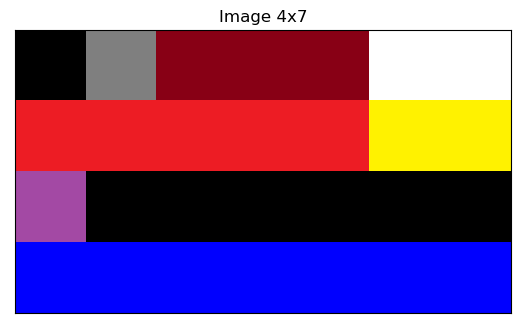

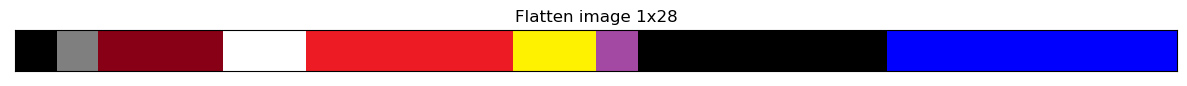

In [80]:
_, R, G, B = read_png('./png_images/28_pixels.png', True, True)
# _, R, G, B = read_png('./png_images/R_video.png', True, True)
# _, R, G, B = read_png('./png_images/pixel_diff.png', True, True)

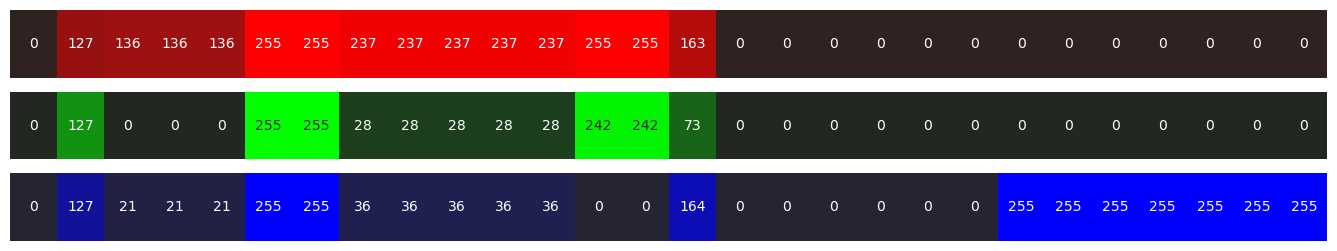

In [81]:
plt.figure(figsize=(17, 3))

indexes_start = 0
indexes_end = len(R)

plt.subplot(3, 1, 1)
heat_channel(R[indexes_start:indexes_end], 'R')

plt.subplot(3, 1, 2)
heat_channel(G[indexes_start:indexes_end], 'G')

plt.subplot(3, 1, 3)
heat_channel(B[indexes_start:indexes_end], 'B')

In [754]:
img_flat = np.vstack((R, G, B)).T
img_flat

array([[  0,   0,   0],
       [127, 127, 127],
       [136,   0,  21],
       [136,   0,  21],
       [136,   0,  21],
       [255, 255, 255],
       [255, 255, 255],
       [237,  28,  36],
       [237,  28,  36],
       [237,  28,  36],
       [237,  28,  36],
       [237,  28,  36],
       [255, 242,   0],
       [255, 242,   0],
       [163,  73, 164],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255],
       [  0,   0, 255]])

In [755]:
QOI_RUN = False
QOI_DIFF_SMALL = False
QOI_DIFF_MED = False
QOI_INDEX = False
QOI_RGB = False

n = len(R)

encoded_img = []
rgb_elem = {'QOI_RGB': [R[0], G[0], B[0]]}
encoded_img.append(rgb_elem)

run_length = 0

for i in range(1, n):
    cur_pixel = img_flat[i]
    prev_pixel = img_flat[i-1]
    
    if np.all(cur_pixel == prev_pixel):
        # print('a')
        run_length += 1
        QOI_RUN = True
        continue
        
    else:
        if QOI_RUN:
            run_elem = {'QOI_RUN': run_length}
            encoded_img.append(run_elem)
            run_length = 0
            QOI_RUN = False
        
        rgb_elem = {'QOI_RGB': [R[i], G[i], B[i]]}
        encoded_img.append(rgb_elem)
    

# last run processing
if QOI_RUN:
    run_elem = {'QOI_RUN': run_length}
    encoded_img.append(run_elem)
    run_length = 0
    QOI_RUN = False

In [756]:
encoded_img

[{'QOI_RGB': [0, 0, 0]},
 {'QOI_RGB': [127, 127, 127]},
 {'QOI_RGB': [136, 0, 21]},
 {'QOI_RUN': 2},
 {'QOI_RGB': [255, 255, 255]},
 {'QOI_RUN': 1},
 {'QOI_RGB': [237, 28, 36]},
 {'QOI_RUN': 4},
 {'QOI_RGB': [255, 242, 0]},
 {'QOI_RUN': 1},
 {'QOI_RGB': [163, 73, 164]},
 {'QOI_RGB': [0, 0, 0]},
 {'QOI_RUN': 5},
 {'QOI_RGB': [0, 0, 255]},
 {'QOI_RUN': 6}]

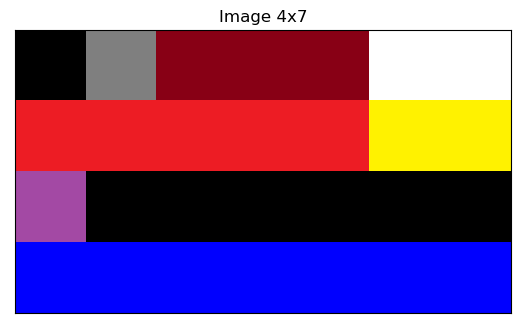

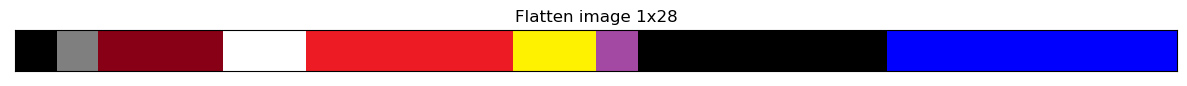

In [866]:
_, R, G, B = read_png('./png_images/28_pixels.png', True, True)

### Diff test

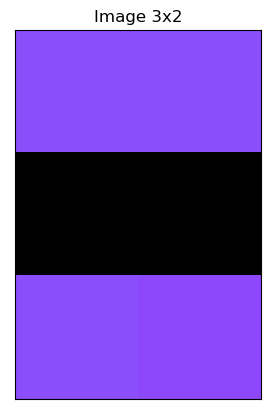

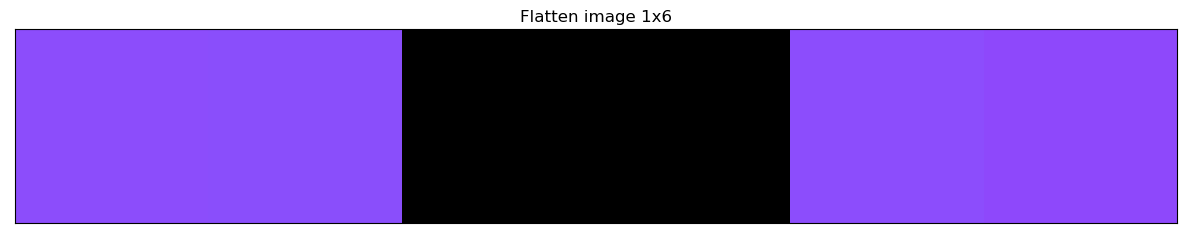

In [82]:
_, R, G, B = read_png('./png_images/pixel_diff.png', True, True)

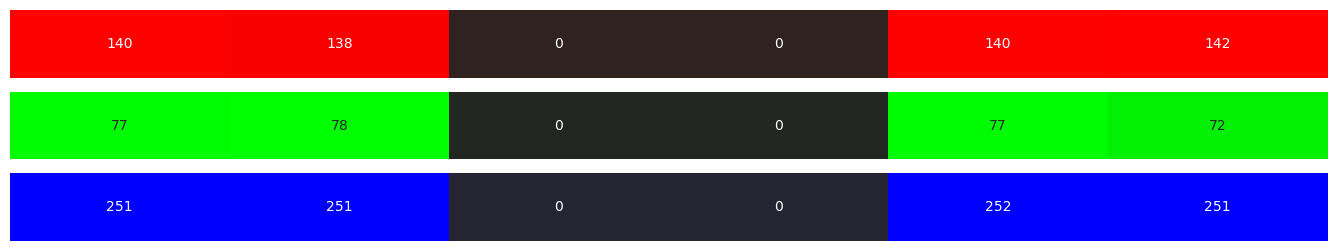

In [83]:
plt.figure(figsize=(17, 3))

indexes_start = 0
indexes_end = len(R)

plt.subplot(3, 1, 1)
heat_channel(R[indexes_start:indexes_end], 'R')

plt.subplot(3, 1, 2)
heat_channel(G[indexes_start:indexes_end], 'G')

plt.subplot(3, 1, 3)
heat_channel(B[indexes_start:indexes_end], 'B')

In [388]:
img_flat = np.vstack((R, G, B)).T
img_flat

array([[140,  77, 251],
       [138,  78, 251],
       [  0,   0,   0],
       [  0,   0,   0],
       [140,  77, 252],
       [142,  72, 251]])

In [389]:
QOI_RUN = False
QOI_DIFF_SMALL = False
QOI_DIFF_MED = False
QOI_INDEX = False
QOI_RGB = False

n = len(R)

encoded_img = []
rgb_elem = {'QOI_RGB': [R[0], G[0], B[0]]}
encoded_img.append(rgb_elem)

run_length = 0

for i in range(1, n):
    cur_pixel = img_flat[i]  # поменять: читать из R, G, B
    prev_pixel = img_flat[i-1]
    print(cur_pixel)
    
    if np.all(cur_pixel == prev_pixel):
        QOI_RUN = True
        run_length += 1
        continue
    
    
    dr = R[i] - R[i-1]
    dg = G[i] - G[i-1]
    db = B[i] - B[i-1]
    # print(dr, dg, db)
    
    # (!) более сильное условие, чем последующее (его проверка должна илти первой) 
    if (-2 <= dr <= 1) and (-2 <= dg <= 1) and (-2 <= db <= 1):
        QOI_DIFF_SMALL = True
        small_diff_elem = {'QOI_DIFF_SMALL': [dr, dg, db]}
        encoded_img.append(small_diff_elem)
        QOI_DIFF_SMALL = False
        continue
    
    if (-32 <= dg <= 31) and (-8 <= (dr-dg) <= 7) and (-8 <= (db-dg) <= 7):
        QOI_DIFF_MED = True
        med_diff_elem = {'QOI_DIFF_MED': [dg, (dr-dg), (db-dg)]}
        encoded_img.append(med_diff_elem)
        QOI_DIFF_MED = False
        continue
    
    
    else:
        if QOI_RUN:
            run_elem = {'QOI_RUN': run_length}
            encoded_img.append(run_elem)
            run_length = 0
            QOI_RUN = False
        
        rgb_elem = {'QOI_RGB': [R[i], G[i], B[i]]}
        encoded_img.append(rgb_elem)
    

# last run processing
if QOI_RUN:
    run_elem = {'QOI_RUN': run_length}
    encoded_img.append(run_elem)
    run_length = 0
    QOI_RUN = False

[138  78 251]
[0 0 0]
[0 0 0]
[140  77 252]
[142  72 251]


In [50]:
[1, 2, 3] == [1, 2, 3]

True

In [761]:
encoded_img

[{'QOI_RGB': [140, 77, 251]},
 {'QOI_DIFF_SMALL': [-2, 1, 0]},
 {'QOI_RGB': [0, 0, 0]},
 {'QOI_RUN': 1},
 {'QOI_RGB': [140, 77, 252]},
 {'QOI_DIFF_MED': [-5, 7, 4]}]

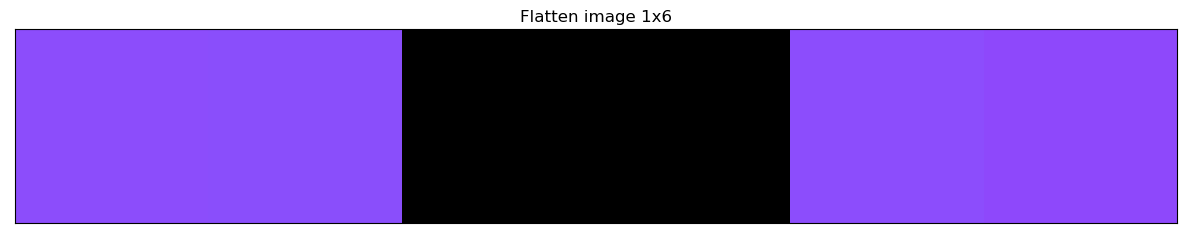

In [763]:
_, R, G, B = read_png('./png_images/pixel_diff.png', False, True)